In [1]:
#Importing all the required modules
import numpy as np
import matplotlib.pyplot as plt
import wave
from playsound import playsound as play
%matplotlib inline

In [2]:
#Previously used functions

# This is the algorithm for computing DTFT of given signal
# The parameters for this Algorithm is a signal of shape (2, N) or  (N, )
# it has some default parameters like lower limit, higher limit and Number of points for omega axis

def dtft(signal, low_lim=-1*np.pi, high_lim=np.pi, N=100, endpoints=False):
    w = np.linspace(low_lim, high_lim, N, endpoint=endpoints)                  #Array of omega values
    e_jw = np.exp(w*1j)                                                    #computes e^{jw}
    
    # Creates a dictnationry to store dtft, Magnitude, Phase and omega
    dtft = dict()        
    # Creates a empty array for dtft
    dtft['complex'] = np.zeros(N, dtype=complex) 
    # Assiging omega values 
    dtft['omega'] = w
    
    # The following conditional statements are for checking whether the input(signal) is been provided with 
    # time stamps
    if signal.shape[0] == 2:
        for i in range(signal.shape[1]):
            dtft['complex'] += signal[0, i]*np.power(e_jw, -1*signal[1, i])
    else:
        for i in range(signal.shape[0]):
            dtft['complex'] += signal[i]*np.power(e_jw, -1*i)

    # Rounds-off the result upto 4 decimal places
    dtft['complex'] = np.round(dtft['complex'], decimals=4)
    # Finds the magnitude of the dtft computed above.
    dtft['magnitude'] = np.absolute(dtft['complex'])
    # Finds the phase of dtft in radians which lies in the range[-pi, pi]
    dtft['phase'] = np.angle(dtft['complex'], deg=0)
    return dtft
# This below function flips the w axis 
# Input:- X(e^jw) 
# Output:- X(e^-jw)
def negate_dtft(dtft):
    dtft['complex'] = np.flip(dtft['complex'])
    dtft['magnitude'] = np.absolute(dtft['complex'])
    dtft['phase'] = np.angle(dtft['complex'], deg=0)
    return dtft

# This below function finds the conjugate of dtft.
# Input:- X(e^jw) 
# Output:- X*(e^jw)
def conjugate(dtft):
    dtft['complex'] = np.conj(dtft['complex']) 
    dtft['phase'] = -1*dtft['phase']
    return dtft


# This function is used for plotting Real part, Imaginary part, Magnitude and Phase for a given DTFT

def dtft_plotter(dtft, title=None, complex_part=False):
    plt.rcParams['figure.figsize'] = [10, 4] #Setting the plotting area
    
    if complex_part:                         #For complex signals
        fig, ax = plt.subplots(2,2)

        if title != None:                    #Setting title
            fig.suptitle(title, fontweight="bold")
        #Plotting the real part
        ax[0, 0].title.set_text('Real Part')
        ax[0, 0].stem(dtft['omega'], np.real(dtft['complex']),use_line_collection=True)
        ax[0, 0].set(ylabel='$Re\{X(e^{j \omega})\}$')
        #Plotting the Imaginary part
        ax[0, 1].title.set_text('Imaginary Part')
        ax[0, 1].stem(dtft['omega'], np.imag(dtft['complex']), 'tab:red',use_line_collection=True)
        ax[0, 1].yaxis.tick_right()
        ax[0, 1].set(ylabel='$Im\{X(e^{j \omega})\}$')
        #Plotting the Magnitude of DTFT
        ax[1, 0].title.set_text('Magnitude')
        ax[1, 0].stem(dtft['omega'], dtft['magnitude'], 'tab:orange',use_line_collection=True)
        ax[1, 0].set(xlabel='$\omega$', ylabel='$|X(e^{j \omega})|$')
        #Plotting the Phase of DTFT
        ax[1, 1].title.set_text('Phase')
        ax[1, 1].stem(dtft['omega'], dtft['phase'], 'tab:green',use_line_collection=True)
        ax[1, 1].yaxis.tick_right()        
        ax[1, 1].set(ylabel='$\phi$')
    else:                                   #For Real signal
        #Plotting the Magnitude of DTFT
        fig, (ax1, ax2) = plt.subplots(1, 2)
        if title != None:                    #Setting title
            fig.suptitle(title, fontweight="bold")
        ax1.stem(dtft['omega'],dtft['magnitude'],use_line_collection=True)
        ax1.set(xlabel='$\omega$', ylabel='$X(e^{j \omega})$')
        ax1.title.set_text('Magnitude')
        #Plotting the Phase of DTFT
        ax2.stem(dtft['omega'],dtft['phase'], 'tab:green',use_line_collection=True)
        ax2.plot(xlabel = 'n', ylabel=r'$\phi$')
        ax2.title.set_text('Phase')
        
        
#This below function will take a file as .wav audio file as input and that verbose default parameter which will
#helpful for printing Specifications of audio file such as #frames, framerate, duration, etc.
#Output of this function will return audio signal array, time duration and Number of frames

def wavfile_to_nparray(FILE, verbose=0, time_len=None, normalise=False):
    audio_file = wave.open(FILE, 'rb')             #Opening the .wav file
    params = audio_file.getparams()                #Getting parameters of the audio file
    fr = params[2]
    if time_len != None:
        nframes = int(time_len*fr)
    else:
        nframes = params[3]
    audio_frame = audio_file.readframes(nframes)        #Reading all frames of the audio file 
    audio = np.zeros(nframes)                    #Creating an empty array for storing the values
    
    # Since the frames are3 being stores as bytes format each value will be a size of 1Byte(*bits)
    # Thus we get values ranging from 0 to 255
    # To avoid large values of dtft magnitude so we are normalizing signal from -1 to 1 
    # the audio signal to have better representation in time domain
    
    for i in range(len(audio_frame)):              
        audio[i] = audio_frame[i]                  #Storing the byte value in int array

    duration = nframes/fr                 #Time duration of the signal
    #Normalising the wave amplitude
    if normalise:
        audio = audio/2**7 - 1
    #Printing all the parameters of the wave
    if verbose:
        print('Channels=',params[0], ', SampleWidth=', params[1],'\bbytes' 
              ,', Framerate=', fr, '\bHz', ', Frames=', nframes, '\nDuration:', time_len if time_len else 
              duration, '\bs\n')
    return audio, duration, nframes, fr

#This below function will Plot the Time signal. Computes DTFT and also plots Magnitude and phase

def analyise_wav_file(file, normalise, time_len=None, verbose=0):
    #Reading the wave file, and converting to array
    audio, t, frames, _ = wavfile_to_nparray(file, verbose=verbose, time_len=time_len, normalise=normalise)
    time = np.linspace(0, t, frames)          #Time scale
    
    dtft_audio = dtft(audio, N=200)           #Finding the DTFT of the wave file
    
    plt.rcParams['figure.figsize'] = [20, 4]  #Setting the plotting area
    plt.rc('axes', labelsize=12)              #Setting the labels size
    
    plt.figure()                                            #Plotting Time signal
    plt.title(file, fontsize='large', fontweight='bold')
    plt.plot(time, audio, color='green')

#                                                             #Plotting Magnitude and Phase
    fig, (ax1, ax2) = plt.subplots(1,2)
    plt.suptitle("DTFT of "+file)
    ax1.title.set_text('Magnitude')
    ax1.stem(dtft_audio['omega'], dtft_audio['magnitude'],use_line_collection=True)
    ax1.set(xlabel='$\omega$', ylabel='$|X(e^{j \omega})|$')

    ax2.title.set_text('Phase')
    ax2.set(xlabel='$\omega$', ylabel='$\phi$')
    ax2.stem(dtft_audio['omega'], dtft_audio['phase'], 'tab:red',use_line_collection=True)
#     dtft_plotter(dtft_audio)


#Function for doing convolution
#Method adopted : Shift and Overlap; Moving window-h
def convolve(x, h, plot=True):
    n  =  x.shape[0]#Finding the length of the x input
    m = h.shape[0]#Finding the length of the impulse function
    #print("x[n]: ", x)#Input Sequence
    #print("h[n]: ", h)#Impulse response
    h = np.flip(h)#Flipping the impulse response
    pads = np.zeros(m-1)#Padding for the input array for calculation purpose
    xg = x
    x =  np.hstack((pads, x, pads))#Padding the input signal at the start and end
    y = np.array([np.dot(x[i:i+m], h) for i in range(n+m-1)])#Summing the overlapped region

    #print("y[n] = x[n]*h[n]: ", y)#Output sequence
    #Plot
    if plot:
        h = np.flip(h)#Flipping the impulse response
        l = 15 #Range of plot
        n = np.linspace(-2, l, l+3)#n-x-axis
        x = np.hstack((np.zeros(2), xg, np.zeros(l+1-xg.shape[0])))#input sequence with padded zeros
        h = np.hstack((np.zeros(2), h, np.zeros(l+1-h.shape[0])))#Impulse sequence with padded zeros
        y = np.hstack((np.zeros(2), y, np.zeros(l+1-y.shape[0])))#output sequence with padded zeros

        plt.rcParams['figure.figsize'] = [20, 4]#Setting the plot area
        plt.rc('axes', labelsize=12)#Setting the label siz
        #Plot of Input sequence
        fig, (ax1,ax2) = plt.subplots(1, 2)
        ax1.stem(n, x,use_line_collection=True)
        #Plot of impulse response
        ax1.set(xlabel='n', ylabel='x[n]')
        ax2.stem(n, h,use_line_collection=True)
        ax2.set(xlabel='n', ylabel='h[n]')
        #Plot of output sequence
        plt.figure()
        plt.stem(n, y,use_line_collection=True)
        plt.xlabel('n')
        plt.ylabel('y[n]')
    
    return y

#Function which convolves the data from a wave file and creates a new wave file with
#data resulting from the convolution of original signals data and given impulse response
def audio_convolve(i, h, normalisation, o, time_len=None):
    #Reading and extracting data from the original signal  
    x, t, nframes, fr = wavfile_to_nparray(i, time_len=time_len, normalise=normalisation)    
    #Creating the newfile
    y_file = o
    y_filep = wave.open(y_file, 'wb')
    #Setting the wave file parameters
    y_filep.setnchannels(1)
    y_filep.setsampwidth(1)
    y_filep.setframerate(fr)
    #Finding the convolution data 
    y = convolve(x, h, plot=False)
    #Normalising the data 
    if normalisation:
        y = np.clip(y, -1, 1)
        y = (y+1)*(2**7)
    else:
        y = np.clip(y, 0, 255)
    #Converting the byte code to nparray
    y = y.astype(np.uint8)
    y = y.tobytes()
    y_filep.writeframesraw(y)#Writing the new framesdata
    y_filep.close()#Closing the wave file
    return y_file


#Function for plotting the impulse responses

def impulse_plot(n,h,prop=True):
    sig = np.vstack((h,n))
    H = dtft(sig)                               #Finding the DTFT of the impulse response
    #For plotting the impulse response
    plt.rcParams['figure.figsize'] = [20, 4]  #Setting the plotting area
    plt.rc('axes', labelsize=12)              #Setting the labels size
    plt.figure()                                            #Plotting Time signal
    plt.title('Impulse Response', fontsize='large', fontweight='bold')
    plt.stem(n,h,use_line_collection=True)
    plt.xlabel('n')
    plt.ylabel('h[n]')

    if prop == True:  
    #Plotting Magnitude and Phase
        fig, (ax1, ax2) = plt.subplots(1,2)
        plt.suptitle("DTFT of h[n]")
        ax1.title.set_text('Magnitude')
        ax1.stem(H['omega'], H['magnitude'],use_line_collection=True)
        ax1.set(xlabel='$\omega$', ylabel='$|H(e^{j \omega})|$')

        ax2.title.set_text('Phase')
        ax2.set(xlabel='$\omega$', ylabel='$\phi$')
        ax2.stem(H['omega'], H['phase'], 'tab:red',use_line_collection=True)

#Function for group delay
#Group delay function
def grd(Phase):
    num = len(Phase)
    dw = 2*np.pi/num
    gd = np.zeros(num-1)
    for i in range(num-1):
        gd[i] = (Phase[i]-Phase[i+1])/dw
        if gd[i]>8 or gd[i]<-8:
            gd[i]=0
    return gd


#Function for plotting group delay for given h[n]
def impulse_grd(n,h):
    H = dtft(h,low_lim=-np.pi,high_lim=np.pi) 
    gd = grd(H['phase'])
    w = np.linspace(0,2*np.pi,len(H['phase'])) #w - range
    #For plotting the impulse response
    plt.title('Impulse Response', fontsize='large', fontweight='bold')
    plt.stem(n,h,use_line_collection=True)
    plt.xlabel('n')
    plt.ylabel('h[n]')
    #For plotting , setting area
    plt.rcParams['figure.figsize'] = [20, 4]  #Setting the plotting area
    plt.rc('axes', labelsize=12)              #Setting the labels size
    plt.figure()                                          
    #Plotting Group Delay
    plt.title('Group Delay', fontsize='large', fontweight='bold')
    plt.stem(w[0:len(gd)],gd,use_line_collection=True)
    plt.xlabel('$\omega$')
    plt.ylabel('$grd(H(e^{j \omega}))$')

    #                                                             #Plotting Magnitude and Phase
    fig, (ax1, ax2) = plt.subplots(1,2)
    plt.suptitle("DTFT of h[n]")
    ax1.title.set_text('Magnitude')
    ax1.stem(H['omega'], H['magnitude'],use_line_collection=True)
    ax1.set(xlabel='$\omega$', ylabel='$|H(e^{j \omega})|$')

    ax2.title.set_text('Phase')
    ax2.set(xlabel='$\omega$', ylabel='$\phi$')
    ax2.stem(H['omega'], H['phase'], 'tab:red',use_line_collection=True)

    
#Function for finding Phase Spectrum,Magnitude spectrum, and group delay
def analyse_lti(a,b,num = 100,plot = True): #Sequences of ak,bk & num is Number of datapoints in w
    w = np.linspace(-np.pi,np.pi,num) #w - range
    e = np.exp(-1j*w)   # e^-jw
    numr = np.zeros(len(w))*1j
    denmr = np.zeros(len(w))*1j
    for m in range(len(b)): # Calculating numerator sum
        z = e**m
        numr += b[m]*z
    for k in range(len(a)):#Calculating denominator sum
        z = e**k
        denmr += a[k]*z
    H = numr/denmr      #H(e^jw)
    Mag = abs(H)        #|H(e^jw)|
    Phase = np.angle(H) #phase<H(e^jw)>
    #print(len(Phase))
    #Group delay
    gr_d = grd(Phase)
    #Plot
    if plot:
        #For plotting the impulse response
        plt.rcParams['figure.figsize'] = [20, 4]  #Setting the plotting area
        plt.rc('axes', labelsize=12)              #Setting the labels size
        plt.figure()                              #Plotting Magnitude
        plt.title('Magnitude', fontsize='large', fontweight='bold')
        plt.stem(w,20*np.log10(Mag),use_line_collection=True)
        plt.xlabel('$\omega$')
        plt.ylabel('$20log|H(e^{j \omega})|$')

        #                                                             #Plotting Group delay and Phase
        fig, (ax1, ax2) = plt.subplots(1,2)
        plt.suptitle("Phase parameters of $H(e^{j \omega})$ ")
        ax1.title.set_text('Group Delay')
        ax1.stem(w[0:num-1], gr_d,use_line_collection=True)
        ax1.set(xlabel='$\omega$', ylabel='$grd(H(e^{j \omega}))$')
        ax2.title.set_text('Phase ')
        ax2.set(xlabel='$\omega$', ylabel='$Phase(\phi)$')
        ax2.stem(w, Phase, 'tab:red',use_line_collection=True)


$\textbf{Problem-1 :}$

Find an example non-causal real and low pass FIR system h[n] that has zero phase. Demonstrate experimentally that the filter is indeed low pass and has zero-phase response. Choose a non-trivial example for this demonstration.

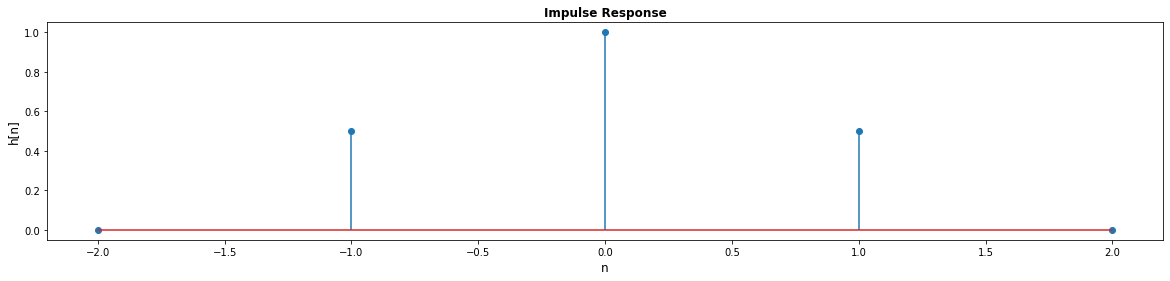

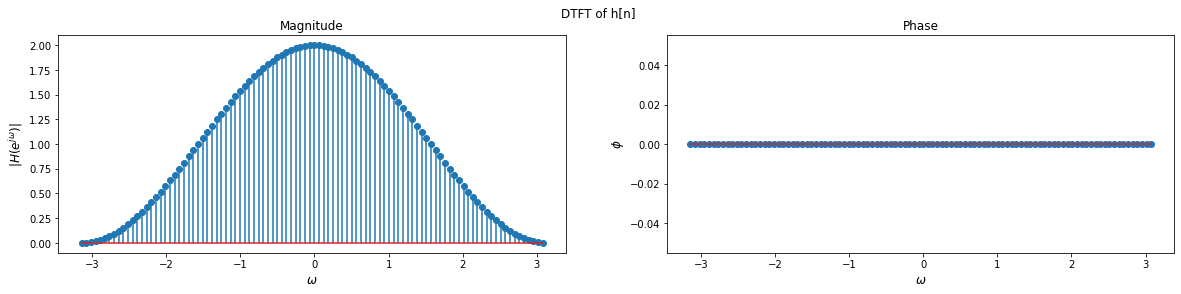

In [3]:
#Consider h[n] = 0.5*(del(n+1)+del(n-1))+del(n)
n = np.arange(5)-2
h = np.zeros(5)
h[1]=0.5
h[2]=1
h[3]=0.5
impulse_plot(n,h)

$\textbf{Observations :}$
1. The above system is non-causal as h is non-zero when n<0 (n=-1).
2. The system is real, i.e. h[n] is always real and can be observed from the impulse plot.
3. The system is low-pass which can be seen from the magnitude spectrum.
4. The system has zero phase which can be seen from the phase spectrum.

$\textbf{Problem-2(a) :} $
Start with a type I system $h_{I}$[n] of length 5 with real values and derive a type III system $h_{III}$[n] from it.

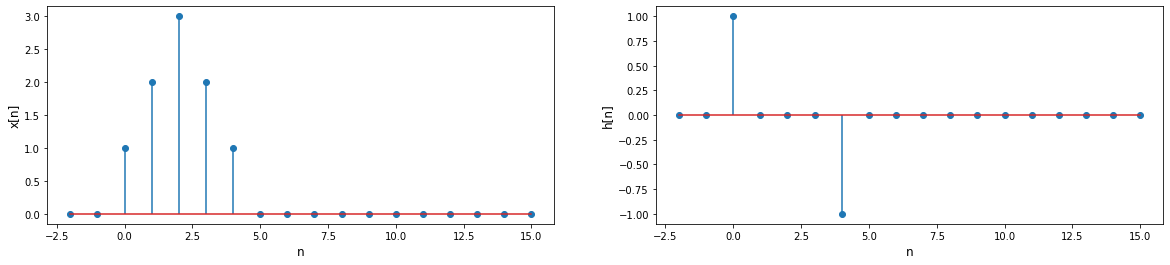

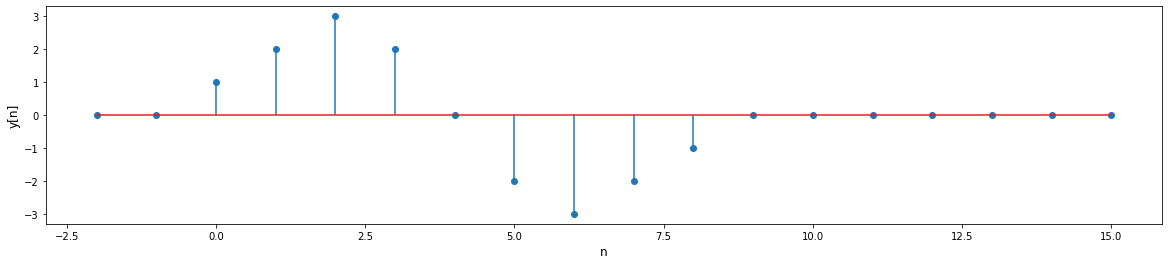

In [4]:
#for type-1 system h[n]=h[M-n] where M is even, by convolving it with del[n]-del[n-M] we can get a type-3 
#M=4 here
h1 = np.array([1,2,3,2,1])
hc = np.array([1,0,0,0,-1])
h3 = convolve(h1,hc)
h3 = h3[2:12]

As can be observed, the type-1 system which has h[n]=h[M-n];n in [0,M] M=4 here, after the convolution, we get type-3 system with h'[n]=-h'[M'-n];n in [0,M'], where M'is 2*M=8 here.

$\textbf{Problem-2(b) :} $
Similarly, start with a type II system $h_{II}[n]$ of length 6 and real values and derive a type IV system $h_{IV}[n]$ from it.

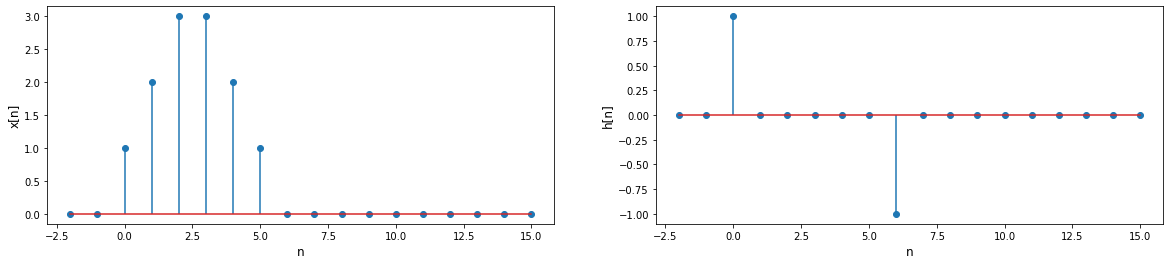

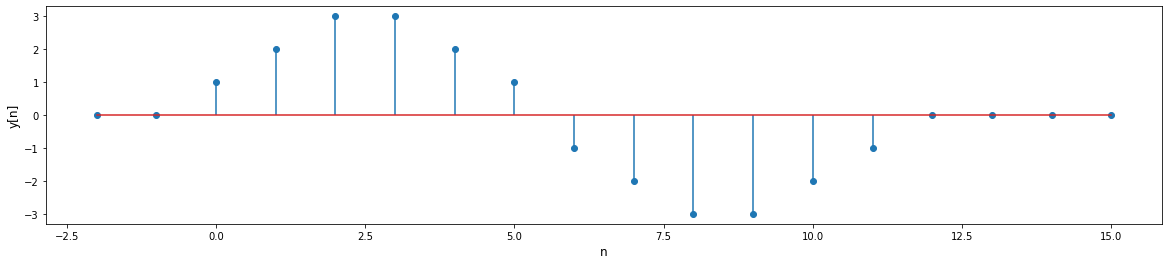

In [5]:
#for type-2 system h[n]=h[M-n] where M is odd, by convolving it with del[n]-del[n-M-1] we can get a type-4 
#M=5 here
h2 = np.array([1,2,3,3,2,1])
hd = np.array([1,0,0,0,0,0,-1])
h4 = convolve(h2,hd)
h4 = h4[2:-3]

As can be observed, the type-2 system which has h[n]=h[M-n];n in [0,M] M=5 here, after the convolution, we get type-4 system with h'[n]=-h'[M'-n];n in [0,M'], where M'is 2*M+1=11 here.

$\textbf{Problem-2(c)}$ : Plot the magnitude response |$H(e^{jω})$|, phase response arg[$H(e^{jω})$] and group delay $grd[H(e^{jω})]$ of each of these systems. Verify experimentally that these are GLP systems and have a constant group delay. Print your observations.

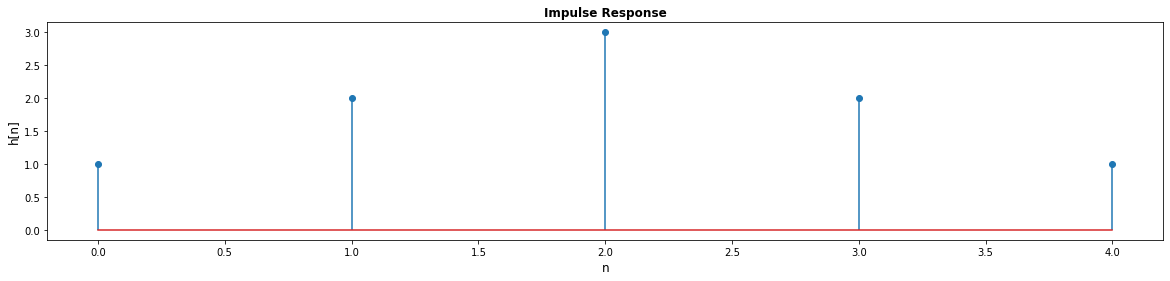

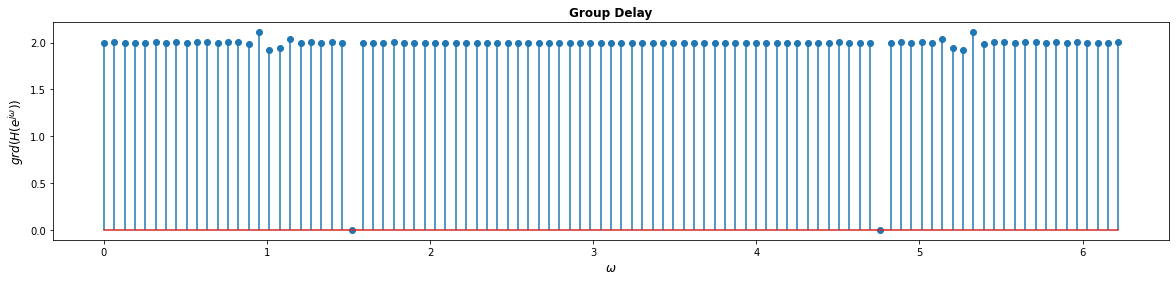

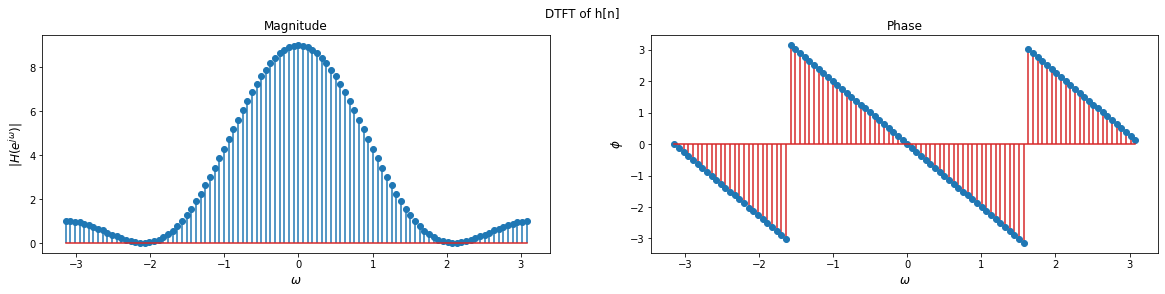

In [6]:
#Type-1 Sytem
n1 = np.arange(len(h1))
impulse_grd(n1,h1)

$\textbf{Observations for Type-I system :}$ 

1.Due to range of arc tan function, we get slight distortion in group delay, neglecting that, the group delay can be seen to be 2(constant).

2.The phase is also linear as shown, the discontinuities can be ignored as by shifting the response by $\pm\pi$, the graph is still linear.

3.The Magnitude response can be approximated to low pass filter, though the tail ends have little rising magnitude.

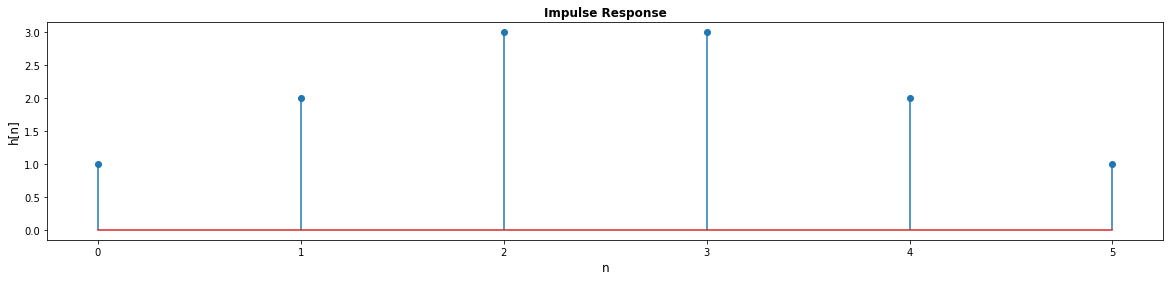

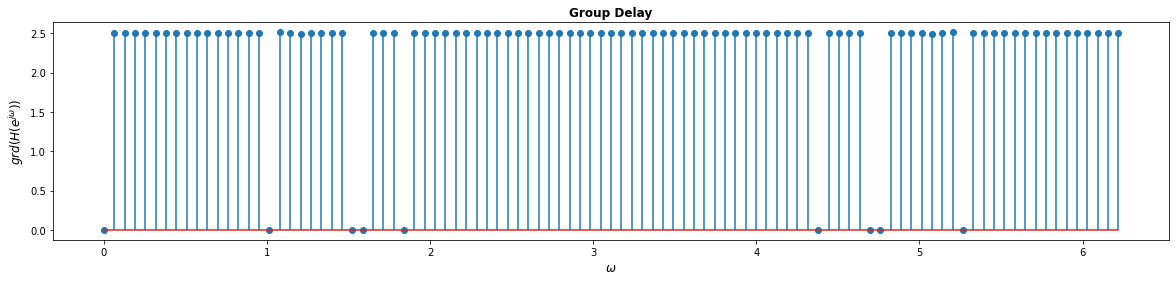

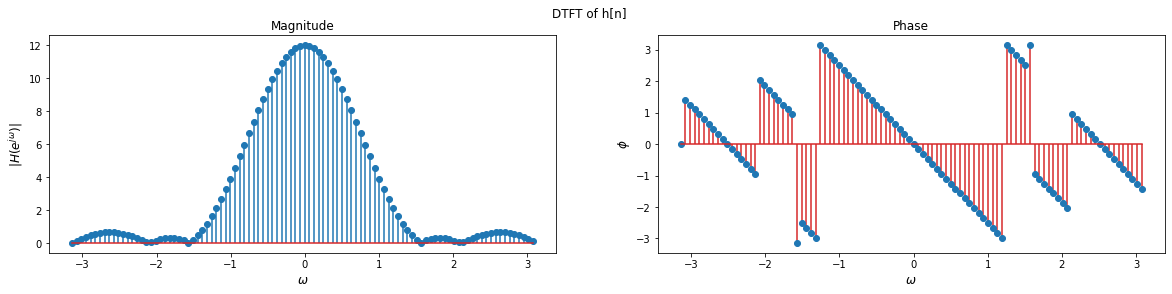

In [7]:
#Type-2 Sytem
n2 = np.arange(len(h2))
impulse_grd(n2,h2)

$\textbf{Observations for Type-II system :}$ 

1.Due to range of arc tan function, we get slight distortion in group delay, neglecting that, the group delay can be seen to be 2.5(constant).

2.The phase is also linear as shown, the discontinuities can be ignored as by shifting the response by $\pm\pi$, the graph is still linear.

3.The Magnitude response can be approximated to low pass filter, though the tail ends have little rising magnitude.

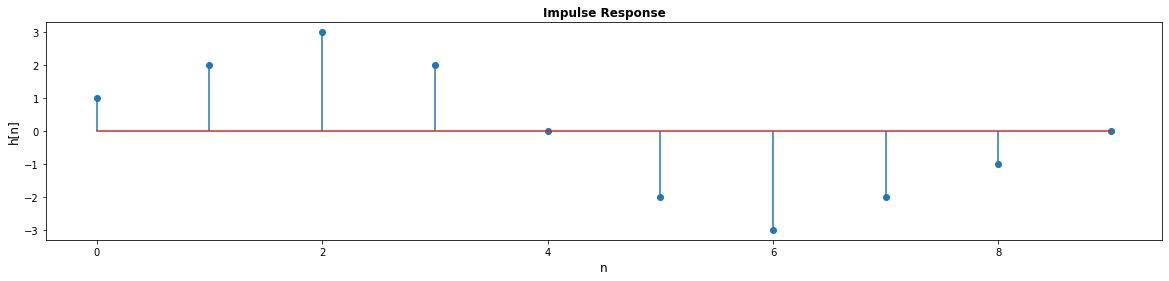

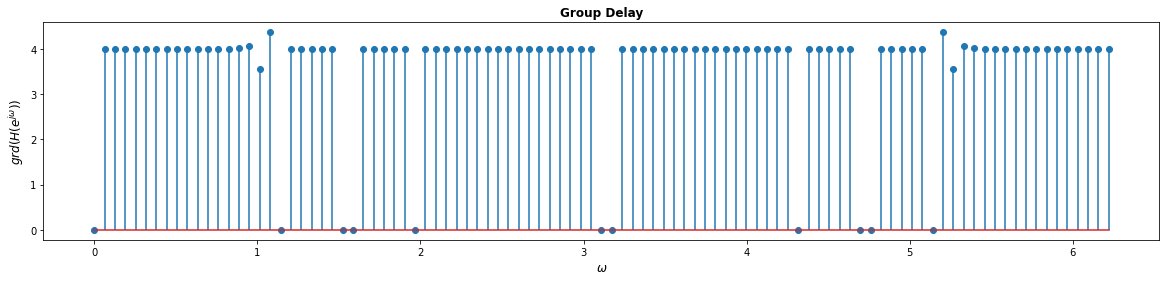

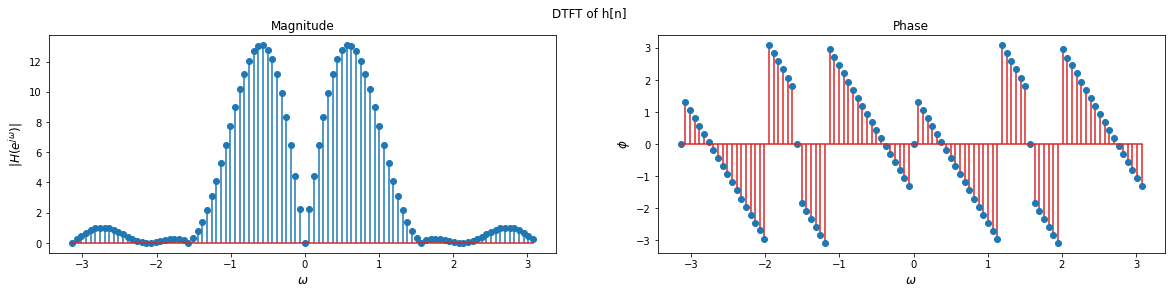

In [8]:
#Type-3 Sytem
n3 = np.arange(len(h3))
impulse_grd(n3,h3)

$\textbf{Observations for Type-III system :}$ 

1.Due to range of arc tan function, we get slight distortion in group delay, neglecting that, the group delay can be seen to be 4(constant).

2.The phase is also linear as shown, the discontinuities can be ignored as by shifting the response by $\pm\pi$, the graph is still linear.

3.The Magnitude response can be approximated to band pass filter, though the tail ends have little rising magnitude.

$\textbf{Observations for Type-IV system :}$ 

1.Due to range of arc tan function, we get slight distortion in group delay, neglecting that, the group delay can be seen to be 5.5(constant).

2.The phase is also linear as shown, the discontinuities can be ignored as by shifting the response by $\pm\pi$, the graph is still linear.

3.The Magnitude response can be approximated to band pass filter, though the tail ends have little rising magnitude.

$\textbf{Problem-2(d) :} $Can you find any relation between $H_{I}(e^{jω})$ and $H_{III}(e^{jω})$, and similarly between $H_{II}(e^{jω})$ and $H_{IV}(e^{jω})$? Print your observations. 

$\textbf{Observations :}$

1. As we have got type-III system by convolving type-I system with $h_c$ which is $\delta[n] - \delta[n-M]$, we can relate

\begin{equation}
H_{III}(e^{jω}) = H_{I}(e^{jω}) . H_{c}(e^{jω})
\end{equation}
\begin{equation}
\implies H_{III}(e^{jω}) = H_{I}(e^{jω}) . (1-e^{-jωM})
\end{equation}

2.  This makes multiplication of magnitude spectrum with 2sin($\frac{\omega M}{2}$) and adds a phase of -($\frac{\omega M}{2} + \frac{\pi}{2}$).

3. Similarly we have got type-IV system by convolving type-II system with $h_d$ which is $\delta[n] - \delta[n-M-1]$, we can relate

\begin{equation}
H_{IV}(e^{jω}) = H_{II}(e^{jω}) . H_{d}(e^{jω})
\end{equation}
\begin{equation}
\implies H_{IV}(e^{jω}) = H_{II}(e^{jω}) . (1-e^{-jω(M+1)})
\end{equation}

4.  This makes multiplication of magnitude spectrum with 2sin($\frac{\omega (M+1)}{2}$) and adds a phase of -($\frac{\omega (M+1)}{2} + \frac{\pi}{2}$).

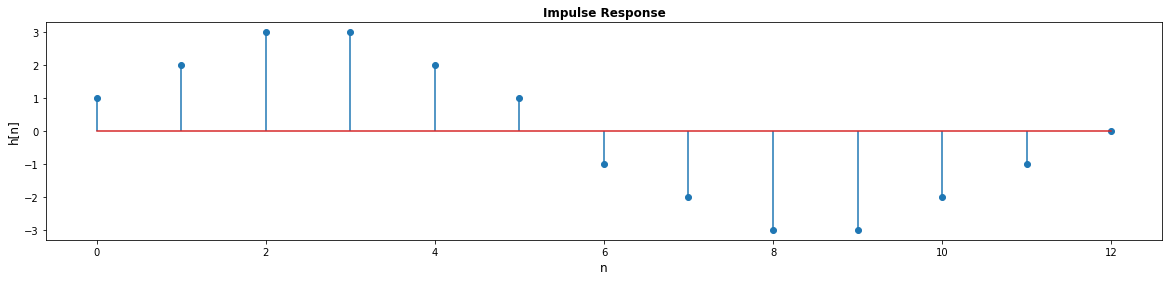

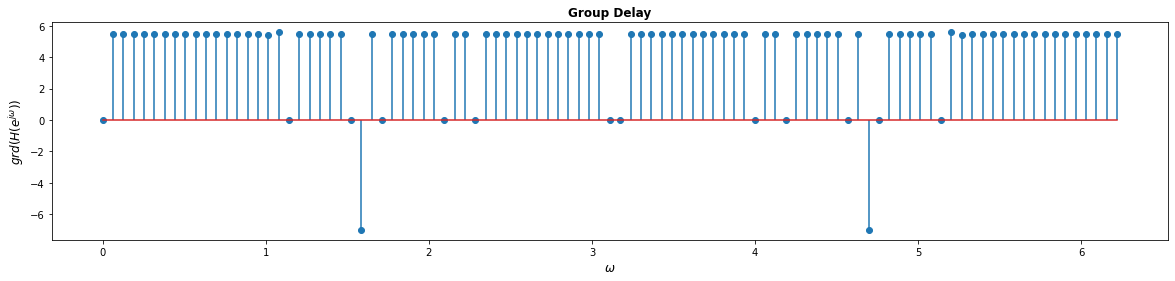

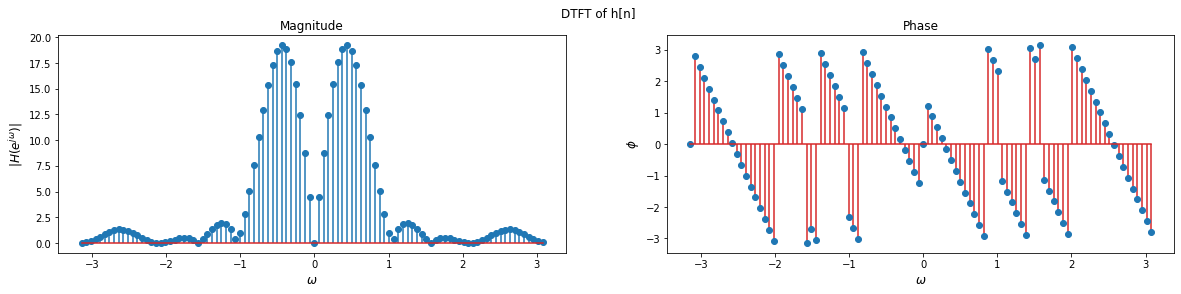

In [9]:
#Type-4 Sytem
n4 = np.arange(len(h4))
impulse_grd(n4,h4)

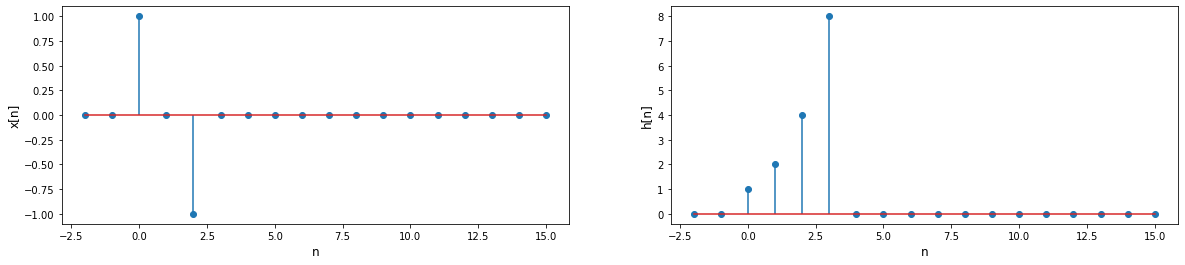

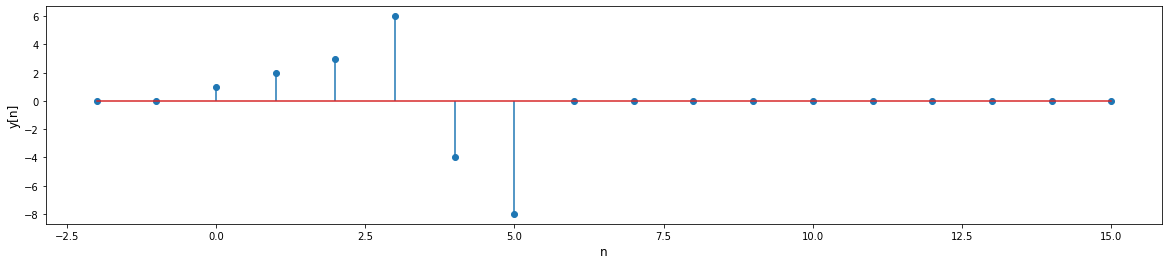

In [10]:
x = np.array([1,0,-1,0])
h = np.array([1,2,4,8])
y = convolve(x,h)